In [142]:
# Importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# For neural network we shall use keras library
import keras
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import math 

In [143]:
# Importing cleaned data
df = pd.read_csv('C:/Users/Varinder/Desktop/Mimic iii Dataset/CSV_Files/CleanedData.csv')

In [144]:
df.isnull().any()

Sr_Num                   False
SUBJECT_ID               False
HADM_ID                  False
ADMITTIME                False
DISCHTIME                False
LOS_Hospital             False
ADMISSION_TYPE           False
EDREGTIME                False
EDOUTTIME                False
LOS_EmergencyDept_Sec    False
LOS_EmergencyDept        False
DIAGNOSIS                 True
HOSPITAL_EXPIRE_FLAG     False
ICD9_CODES               False
dtype: bool

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30877 entries, 0 to 30876
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sr_Num                 30877 non-null  int64 
 1   SUBJECT_ID             30877 non-null  int64 
 2   HADM_ID                30877 non-null  int64 
 3   ADMITTIME              30877 non-null  object
 4   DISCHTIME              30877 non-null  object
 5   LOS_Hospital           30877 non-null  object
 6   ADMISSION_TYPE         30877 non-null  object
 7   EDREGTIME              30877 non-null  object
 8   EDOUTTIME              30877 non-null  object
 9   LOS_EmergencyDept_Sec  30877 non-null  int64 
 10  LOS_EmergencyDept      30877 non-null  object
 11  DIAGNOSIS              30876 non-null  object
 12  HOSPITAL_EXPIRE_FLAG   30877 non-null  int64 
 13  ICD9_CODES             30877 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.3+ MB


In [146]:
print('We have {} number of unique admissions in our dataset.'.format(df['HADM_ID'].nunique()))

We have 30877 number of unique admissions in our dataset.


In [147]:
df.head()

,Sr_Num,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,LOS_Hospital,ADMISSION_TYPE,EDREGTIME,EDOUTTIME,LOS_EmergencyDept_Sec,LOS_EmergencyDept,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,ICD9_CODES
0,1,58526,100001,9/11/2117 11:46,9/17/2117 16:45,6 days 4 hrs 59 mins,EMERGENCY,9/11/2117 8:59,9/11/2117 12:35,12960,0 days 3 hrs 36 mins,DIABETIC KETOACIDOSIS,0,"3371,4580,5363,5780,5849,5853,7078,25013,25043..."
1,2,54610,100003,4/17/2150 15:34,4/21/2150 17:30,4 days 1 hrs 56 mins,EMERGENCY,4/17/2150 13:10,4/17/2150 17:47,16620,0 days 4 hrs 37 mins,UPPER GI BLEED,0,"2,851,401,957,157,050,000,000,000,000,000,000,..."
2,3,9895,100006,4/6/2108 15:49,4/18/2108 17:18,12 days 1 hrs 29 mins,EMERGENCY,4/6/2108 11:39,4/6/2108 17:56,22620,0 days 6 hrs 17 mins,COPD FLARE,0,"486,2761,3090,7850,20300,49320,51881,V1251,V1582"
3,4,23018,100007,3/31/2145 5:33,4/7/2145 12:40,7 days 7 hrs 7 mins,EMERGENCY,3/30/2145 20:43,3/31/2145 6:08,33900,0 days 9 hrs 25 mins,BOWEL OBSTRUCTION,0,"48,640,195,570,997,300,000"
4,5,87977,100011,8/29/2177 4:51,9/12/2177 14:24,14 days 9 hrs 33 mins,EMERGENCY,8/29/2177 4:05,8/29/2177 5:51,6360,0 days 1 hrs 46 mins,MOTOR VEHICLE ACCIDENT WITH UNSPECIFIED INJURIES,0,"2851,8052,8220,8600,8900,30560,48242,80703,821..."


In [148]:
# Convert admission and discharge times to datatime type
df['ADMITTIME'] = pd.to_datetime(df['ADMITTIME'])
df['DISCHTIME'] = pd.to_datetime(df['DISCHTIME'])

df['LOS'] = (df['DISCHTIME'] - df['ADMITTIME'])
df[['ADMITTIME', 'DISCHTIME', 'LOS']]

,ADMITTIME,DISCHTIME,LOS
0,2117-09-11 11:46:00,2117-09-17 16:45:00,6 days 04:59:00
1,2150-04-17 15:34:00,2150-04-21 17:30:00,4 days 01:56:00
2,2108-04-06 15:49:00,2108-04-18 17:18:00,12 days 01:29:00
3,2145-03-31 05:33:00,2145-04-07 12:40:00,7 days 07:07:00
4,2177-08-29 04:51:00,2177-09-12 14:24:00,14 days 09:33:00
...,...,...,...
30872,2107-11-04 16:22:00,2107-11-12 13:01:00,7 days 20:39:00
30873,2175-05-19 18:27:00,2175-05-28 13:45:00,8 days 19:18:00
30874,2161-10-23 18:01:00,2161-11-17 08:10:00,24 days 14:09:00
30875,2188-07-07 18:47:00,2188-07-17 13:31:00,9 days 18:44:00


In [149]:
df['LOS'].describe()

count                      30877
mean      9 days 11:17:19.416394
std      10 days 02:13:23.333597
min            -1 days +01:19:00
25%              3 days 16:24:00
50%              6 days 13:33:00
75%             11 days 16:10:00
max            206 days 10:13:00
Name: LOS, dtype: object

In [150]:
# Data about patients who have lef the hospital.
df[df['LOS'].dt.total_seconds()/86400 < 0]

,Sr_Num,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,LOS_Hospital,ADMISSION_TYPE,EDREGTIME,EDOUTTIME,LOS_EmergencyDept_Sec,LOS_EmergencyDept,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,ICD9_CODES,LOS
833,834,181,102631,2153-10-12 09:49:00,2153-10-12 06:29:00,#VALUE!,EMERGENCY,10/12/2153 6:23,10/12/2153 7:45,4920,0 days 1 hrs 22 mins,DISSECTING ANEURYSIM,1,"424,142,814,411,997,000,000",-1 days +20:40:00
1590,1591,7343,105061,2116-10-09 22:26:00,2116-10-09 12:00:00,#VALUE!,EMERGENCY,10/9/2116 20:39,10/9/2116 23:21,9720,0 days 2 hrs 42 mins,HEAD INJURY;S/P BICYCLIST ACCIDENT,1,"8082,8604,8676,80126,80705,86121,86401,E8146",-1 days +13:34:00
2519,2520,2677,108011,2128-04-16 12:28:00,2128-04-16 12:00:00,#VALUE!,EMERGENCY,4/16/2128 3:23,4/16/2128 14:35,40320,0 days 11 hrs 12 mins,PANCREATITIS,1,"4,241,577,059,904,270,000,000",-1 days +23:32:00
3144,3145,28883,110084,2124-03-06 13:33:00,2124-03-06 12:00:00,#VALUE!,EMERGENCY,3/6/2124 10:38,3/6/2124 15:28,17400,0 days 4 hrs 50 mins,HYPOTENSION,1,"311,340,389,412,2762,2859,4439,5849,5990,27650...",-1 days +22:27:00
3190,3191,13567,110220,2180-12-14 19:23:00,2180-12-14 12:00:00,#VALUE!,EMERGENCY,12/14/2180 1:39,12/14/2180 4:13,9240,0 days 2 hrs 34 mins,ORGAN DONOR,0,0,-1 days +16:37:00
3790,3791,27558,112191,2177-08-16 12:01:00,2177-08-16 12:00:00,#VALUE!,EMERGENCY,8/16/2177 8:35,8/16/2177 13:08,16380,0 days 4 hrs 33 mins,CHEST PAIN,1,"4,864,962,762,416,940,000,000,000,000,000,000,...",-1 days +23:59:00
3942,3943,24256,112694,2138-03-20 16:21:00,2138-03-20 12:00:00,#VALUE!,EMERGENCY,3/20/2138 12:16,3/20/2138 14:46,9000,0 days 2 hrs 30 mins,ACUTE ABDOMEN,1,"496,4280,5570,5680,5856,40391,56729,V4581",-1 days +19:39:00
5252,5253,28945,116984,2123-07-11 15:34:00,2123-07-11 12:00:00,#VALUE!,EMERGENCY,7/11/2123 10:26,7/11/2123 16:35,22140,0 days 6 hrs 9 mins,ALTERED MENTAL STATUS,1,"389,2449,2762,3481,3898,5070,5185,78552,99592,...",-1 days +20:26:00
5349,5350,51654,117296,2137-07-18 18:31:00,2137-07-18 12:00:00,#VALUE!,EMERGENCY,7/18/2137 17:19,7/18/2137 18:18,3540,0 days 0 hrs 59 mins,BLUNT CHEST TRAUMA,1,"2948,4275,5859,8080,25000,40390,86404,86503,86...",-1 days +17:29:00
5376,5377,19719,117378,2189-11-29 12:28:00,2189-11-29 12:00:00,#VALUE!,EMERGENCY,11/29/2189 8:33,11/29/2189 14:19,20760,0 days 5 hrs 46 mins,L BASAL GANGLIA BLEED,1,"431,3051,3485,4019,7051,43889,51881,72989,V5861",-1 days +23:32:00


In [151]:
df = df[df['LOS'].dt.total_seconds()/86400 > 0]

In [152]:
df['LOS'].describe()

count                      30821
mean      9 days 11:42:52.507056
std      10 days 02:14:12.015079
min              0 days 00:06:00
25%              3 days 16:40:00
50%              6 days 14:00:00
75%             11 days 16:24:00
max            206 days 10:13:00
Name: LOS, dtype: object

In [153]:
# Data about patients who have lef the hospital.
df.head()

,Sr_Num,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,LOS_Hospital,ADMISSION_TYPE,EDREGTIME,EDOUTTIME,LOS_EmergencyDept_Sec,LOS_EmergencyDept,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,ICD9_CODES,LOS
0,1,58526,100001,2117-09-11 11:46:00,2117-09-17 16:45:00,6 days 4 hrs 59 mins,EMERGENCY,9/11/2117 8:59,9/11/2117 12:35,12960,0 days 3 hrs 36 mins,DIABETIC KETOACIDOSIS,0,"3371,4580,5363,5780,5849,5853,7078,25013,25043...",6 days 04:59:00
1,2,54610,100003,2150-04-17 15:34:00,2150-04-21 17:30:00,4 days 1 hrs 56 mins,EMERGENCY,4/17/2150 13:10,4/17/2150 17:47,16620,0 days 4 hrs 37 mins,UPPER GI BLEED,0,"2,851,401,957,157,050,000,000,000,000,000,000,...",4 days 01:56:00
2,3,9895,100006,2108-04-06 15:49:00,2108-04-18 17:18:00,12 days 1 hrs 29 mins,EMERGENCY,4/6/2108 11:39,4/6/2108 17:56,22620,0 days 6 hrs 17 mins,COPD FLARE,0,"486,2761,3090,7850,20300,49320,51881,V1251,V1582",12 days 01:29:00
3,4,23018,100007,2145-03-31 05:33:00,2145-04-07 12:40:00,7 days 7 hrs 7 mins,EMERGENCY,3/30/2145 20:43,3/31/2145 6:08,33900,0 days 9 hrs 25 mins,BOWEL OBSTRUCTION,0,"48,640,195,570,997,300,000",7 days 07:07:00
4,5,87977,100011,2177-08-29 04:51:00,2177-09-12 14:24:00,14 days 9 hrs 33 mins,EMERGENCY,8/29/2177 4:05,8/29/2177 5:51,6360,0 days 1 hrs 46 mins,MOTOR VEHICLE ACCIDENT WITH UNSPECIFIED INJURIES,0,"2851,8052,8220,8600,8900,30560,48242,80703,821...",14 days 09:33:00


In [154]:
WT_drop = df.drop(['ADMISSION_TYPE','EDREGTIME','EDOUTTIME','DIAGNOSIS','ICD9_CODES','LOS','ADMITTIME','DISCHTIME','LOS_Hospital','LOS_EmergencyDept'],axis=1)
WT_drop

,Sr_Num,SUBJECT_ID,HADM_ID,LOS_EmergencyDept_Sec,HOSPITAL_EXPIRE_FLAG
0,1,58526,100001,12960,0
1,2,54610,100003,16620,0
2,3,9895,100006,22620,0
3,4,23018,100007,33900,0
4,5,87977,100011,6360,0
...,...,...,...,...,...
30872,30873,10226,199968,19560,0
30873,30874,28549,199987,14160,0
30874,30875,20785,199993,8520,0
30875,30876,23761,199994,15960,0


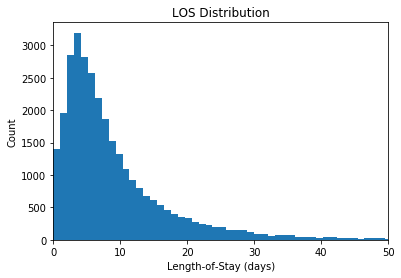

In [155]:
# Plot LOS Distribution
plt.hist(df['LOS'].dt.total_seconds()/86400, bins=200)
plt.xlim(0, 50)
plt.title('LOS Distribution')
plt.ylabel('Count')
plt.xlabel('Length-of-Stay (days)')
plt.show();

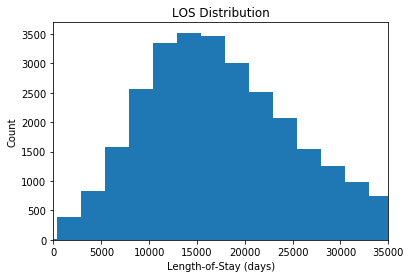

In [156]:
# Plot LOS Distribution
plt.hist(df['LOS_EmergencyDept_Sec'], bins=1100)
plt.xlim(0, 35000)
plt.title('LOS Distribution')
plt.ylabel('Count')
plt.xlabel('Length-of-Stay (days)')
plt.show();

In [157]:
df['ADMISSION_TYPE'].value_counts()

EMERGENCY    30734
URGENT          75
ELECTIVE        12
Name: ADMISSION_TYPE, dtype: int64

In [158]:
print("{} Patients died in the hospital from {}".format(df['HOSPITAL_EXPIRE_FLAG'].sum(),df['HADM_ID'].nunique()))

4038 Patients died in the hospital from 30821


In [159]:
# define target variable

In [160]:
X = WT_drop.drop(columns = 'LOS_EmergencyDept_Sec')
y = WT_drop[['LOS_EmergencyDept_Sec']]

In [161]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30821 entries, 0 to 30876
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Sr_Num                30821 non-null  int64
 1   SUBJECT_ID            30821 non-null  int64
 2   HADM_ID               30821 non-null  int64
 3   HOSPITAL_EXPIRE_FLAG  30821 non-null  int64
dtypes: int64(4)
memory usage: 1.2 MB


In [162]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30821 entries, 0 to 30876
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   LOS_EmergencyDept_Sec  30821 non-null  int64
dtypes: int64(1)
memory usage: 481.6 KB


In [163]:
y.head()

,LOS_EmergencyDept_Sec
0,12960
1,16620
2,22620
3,33900
4,6360


In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Random forest 

In [166]:
from sklearn.ensemble import RandomForestRegressor

In [167]:
forest = RandomForestRegressor(n_estimators=100, random_state=0)

In [168]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [169]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.805
Accuracy on test set: -0.226


# Gradient boosting

In [170]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(random_state=0, max_depth=2,  max_features=2) 
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train))) 
gbrt.score(X_test, y_test)

Accuracy on training set: 0.482


0.02644852668882436

# Logistic regression

In [171]:
from sklearn.linear_model import LogisticRegression

In [172]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [173]:
print("Accuracy on training set: {:.3f}".format(lr.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(lr.score(X_test, y_test)))

Accuracy on training set: 0.004
Accuracy on test set: 0.002


# K-neighbour

In [174]:
from sklearn import neighbors

In [175]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)

In [176]:
model.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train))) 
model.score(X_test, y_test)

Accuracy on training set: 0.275


-0.28394358285013066

# confusion matrix

In [177]:
from sklearn.metrics import confusion_matrix
pred_logreg = lr.predict(X_test)
confusion = confusion_matrix(y_test,pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# linear regression

In [ ]:
# split to test and train, build & fit the model. predict target
#df_model=LinearRegression()
#df_model.fit(X_train,y_train)
#predict_val=df_model.predict(X_test)
#plt.scatter(X,y)
#plt.plot(X_test, y_test,color='red')
#plt.show()